# Test-retest analysis - Retest sample

## Analysis overview

#### Discovery sample

1. Model fitting: [`Model fitting - Discovery.ipynb`](<../../notebooks/discovery/Model fitting - Discovery.ipynb>)
2. Confidence analysis: [`Confidence analysis - Discovery.ipynb`](<../../notebooks/discovery/Confidence analysis - Discovery.ipynb>)
3. Transdiagnostic factor estimation: [`Transdiagnostic factors - Discovery.ipynb`](<../../notebooks/discovery/Transdiagnostic factors - Discovery.ipynb>)
4. Symptom-behaviour analyses: [`Symptom analyses - Discovery.ipynb`](<../../notebooks/discovery/Symptom analyses - Discovery.ipynb>)

#### Replication sample

1. Model fitting: [`Model fitting - Replication.ipynb`](<../../notebooks/replication/Model fitting - Replication.ipynb>)
2. Confidence analysis: [`Confidence analysis - Replication.ipynb`](<../../notebooks/replication/Confidence analysis - Replication.ipynb>)
3. Two-step task analysis: [`Two-step modelling - Replication.ipynb`](<../../notebooks/replication/Two-step modelling - Replication.ipynb>)
4. Transdiagnostic factor estimation: [`Transdiagnostic factors - Replication.ipynb`](<../../notebooks/replication/Transdiagnostic factors - Replication.ipynb>)
5. Symptom-behaviour analyses: [`Symptom analyses - Replication.ipynb`](<../../notebooks/replication/Symptom analyses - Replication.ipynb>)

#### Test-retest sample

1. Model-fitting: [`Model fitting - Retest.ipynb`](<../../notebooks/retest/Model fitting - Retest.ipynb>)
2. Two-step modelling: [`Two-step modelling - Retest.ipynb`](<../../notebooks/retest/Two-step modelling - Retest.ipynb>)
3. **⭐ Test-retest reliability analyses: [`Test-retest - Retest.ipynb`](<../../notebooks/retest/Test-retest - Retest.ipynb>)** ⭐

#### Follow-up sample

1. Model fitting: [`Model fitting - Follow up.ipynb`](<../../notebooks/follow-up/Model fitting - Follow up.ipynb>)
2. Transdiagnostic factor estimation: [`Transdiagnostic factors - Follow up.ipynb`](<../../notebooks/follow-up/Transdiagnostic factors - Follow up.ipynb>)
3. Test-retest reliability analyses: [`Test-retest - Follow up.ipynb`](<../../notebooks/follow-up/Test-retest - Follow up.ipynb>)
4. Longitudinal analyses: [`Longitudinal analyses - Follow up.ipynb`](<../../notebooks/follow-up/Longitudinal analyses - Follow up.ipynb>)

#### Follow-up sample (1 year)

1. Model fitting: [`Model fitting - Follow up 1yr.ipynb`](<../../notebooks/follow-up-1yr/Model fitting - Follow up 1yr.ipynb>)
2. Transdiagnostic factor estimation: [`Transdiagnostic factors - Follow up 1yr.ipynb`](<../../notebooks/follow-up-1yr/Transdiagnostic factors - Follow up 1yr.ipynb>)
3. Test-retest reliability analyses: [`Test-retest - Follow up 1yr.ipynb`](<../../notebooks/follow-up-1yr/Test-retest - Follow up 1yr.ipynb>)
4. Longitudinal analyses: [`Longitudinal analyses -  Follow up 1yr.ipynb`](<../../notebooks/follow-up-1yr/Longitudinal analyses - Follow up 1yr.ipynb>)

## Notebook overview

Here we look at changes in our task measures over a 2-week period.

## Imports

In [1]:
import os

import pandas as pd
from stats_utils.reliability.icc import calculate_intraclass_correlations
from stats_utils.reliability.utils import icc_to_markdown_table

from transition_uncertainty.analysis_utils import calculate_performance
from transition_uncertainty.data import load_and_process_data
from transition_uncertainty.plotting import (
    plot_timepoint_correlations,
    plot_timepoint_stripplots,
)
from transition_uncertainty.style import set_style
from transition_uncertainty.utils import (
    check_directories,
    save_markdown_tables,
)

# Check we're in the right directory
check_directories()

set_style("style.mplstyle")

Font Heebo already available in Matplotlib.
Matplotlib style set to: style.mplstyle with font Heebo


/users/user/.local/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Load data

Here we load in the data from T1 and T2 and combine it into a single dataframe with columns labelled appropriately.

In [2]:
qdata_T1 = load_and_process_data(
    "replication",
    scale=False,
    include_confidence=False,
    include_questionnaire=False,
    include_factor=False,
)
qdata_T2 = load_and_process_data(
    "retest",
    scale=False,
    include_confidence=False,
    include_questionnaire=False,
    include_factor=False,
)

# merge on subjectID
qdata = pd.merge(qdata_T1, qdata_T2, on="subjectID", suffixes=("__T1", "__T2"))

# Convert to long format
qdata_long = pd.melt(
    qdata, id_vars="subjectID", var_name="variable", value_name="value"
)

# get timepoint from factor column
qdata_long[["variable", "timepoint"]] = qdata_long["variable"].str.extract(
    r"(.*)__([T[0-9]*)"
)

Initial number of subjects: 1400
Number of subjects after filtering and processing: 1400
Initial number of subjects: 80
Number of subjects after filtering and processing: 80


/scratch/users/user/transition_uncertainty/transition_uncertainty/analysis_utils.py:104: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'pink' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  confidence_df.loc[confidence_df["pinkBet"] != 0, "bet_colour"] = "pink"
/scratch/users/user/transition_uncertainty/transition_uncertainty/analysis_utils.py:104: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'pink' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  confidence_df.loc[confidence_df["pinkBet"] != 0, "bet_colour"] = "pink"


## Task measures

### Test-retest reliability using ICC

We calculate the intraclass correlation coefficient (ICC) for each task measure to assess the test-retest reliability of the task measures. We use a custom `calculate_intraclass_correlations` function, which uses the `intraclass_corr` function from [`pingouin`](https://pingouin-stats.org) to calculate the ICC. We use ICC3 here.

In [3]:
task_icc = calculate_intraclass_correlations(
    qdata_long,
    [
        "tau_prob",
        "transition_var",
        "decay_prob",
        "temperature",
        "MB_MF_WAIC_diff",
        "two_step_parameter",
    ],
)

task_icc

,Type,Description,ICC,F,df1,df2,pval,CI95%,variable
2,ICC3,Single fixed raters,0.557853,3.523387,79,79,3.145601e-08,"[0.39, 0.69]",tau_prob
2,ICC3,Single fixed raters,0.501590,3.012758,79,79,9.206823e-07,"[0.32, 0.65]",transition_var
2,ICC3,Single fixed raters,0.097026,1.214904,79,79,1.944264e-01,"[-0.12, 0.31]",decay_prob
2,ICC3,Single fixed raters,0.186461,1.458396,79,79,4.778483e-02,"[-0.03, 0.39]",temperature
2,ICC3,Single fixed raters,0.427996,2.496477,79,79,3.364670e-05,"[0.23, 0.59]",MB_MF_WAIC_diff
2,ICC3,Single fixed raters,0.119715,1.271992,79,79,1.435454e-01,"[-0.1, 0.33]",two_step_parameter


### Plot changes over time

We can plot the `T1` scores against the `T2` scores to see how similar they are. In addition, we calculate the Pearson correlation coefficient between the two timepoints to quantify how similar they are.

array([<Axes: title={'center': 'MB_MF_WAIC_diff: r = 0.51'}, xlabel='T1', ylabel='T2'>,
       <Axes: title={'center': 'transition_var: r = 0.50'}, xlabel='T1', ylabel='T2'>,
       <Axes: title={'center': 'tau_prob: r = 0.57'}, xlabel='T1', ylabel='T2'>],
      dtype=object)

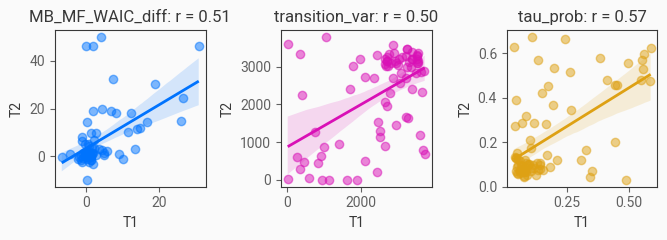

In [4]:
plot_timepoint_correlations(
    qdata, ["MB_MF_WAIC_diff", "transition_var", "tau_prob"]
)

We can also plot the change over time for each task measure, using a single line per subject to show how their parameter estimates change over time.

array([<Axes: title={'center': 'MB_MF_WAIC_diff'}, xlabel='timepoint', ylabel='value'>,
       <Axes: title={'center': 'transition_var'}, xlabel='timepoint', ylabel='value'>,
       <Axes: title={'center': 'tau_prob'}, xlabel='timepoint', ylabel='value'>],
      dtype=object)

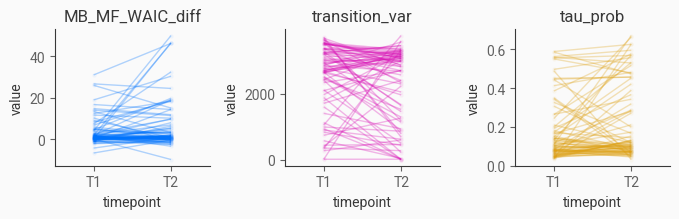

In [5]:
plot_timepoint_stripplots(
    qdata_long, ["MB_MF_WAIC_diff", "transition_var", "tau_prob"]
)

## Other measures

### Look at how score changes (i.e., practice effects)

It's also useful to see how general performance on the task changes from the first to second timepoint - this is likely a practice effect.

Text(-35.62777777777778, 0.5, 'Score')

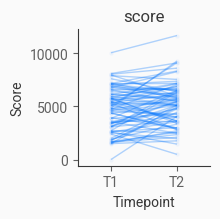

In [6]:
# Get mean/SD of score for each timepoint
qdata_long[qdata_long["variable"] == "value"].groupby(["timepoint"])[
    "value"
].describe().reset_index()

# Plot as a stripplot
ax = plot_timepoint_stripplots(
    qdata_long,
    ["score"],
    fig_kwargs={},
)

# Update the axis labels
ax[0].set_xlabel("Timepoint")
ax[0].set_ylabel("Score")

### Test-retest reliability of behavioural metrics

Here we look at how stable simple behavioural metrics are over time. These include:
* `score`: the number of points earned on the task
* `bet_correct`: accuracy on confidence trials (i.e., predicting the ball colour)
* `exploded`: The number of balls that exploded

In [7]:
calculate_intraclass_correlations(
    qdata_long,
    [
        "score",
        "bet_correct",
        "exploded",
    ],
)

,Type,Description,ICC,F,df1,df2,pval,CI95%,variable
2,ICC3,Single fixed raters,0.699291,5.650938,79,79,1.918714e-13,"[0.57, 0.8]",score
2,ICC3,Single fixed raters,0.578837,3.748754,79,79,7.554485e-09,"[0.41, 0.71]",bet_correct
2,ICC3,Single fixed raters,0.307808,1.889372,79,79,2.591542e-03,"[0.1, 0.49]",exploded


### Save Markdown tables

Finally, we output tables to Markdown for use in the manuscript.

In [8]:
# Create a markdown table
task_icc_table = icc_to_markdown_table(
    task_icc,
    variable_rename_dict={
        "tau_prob": "Transition update rate",
        "decay_prob": "Decay rate",
        "temperature": "Softmax temperature",
        "transition_var": "Transition variance",
        "MB_MF_WAIC_diff": "MB-MF fit difference",
        "two_step_parameter": "Two-step parameter",
    },
)

# Create the caption with proper formatting
caption = (
    "Intraclass correlation coefficients for task variables over "
    "a two-week period. "
    "$ICC$ = intraclass correlation coefficient, $F$ = F-statistic, "
    "$df1$ = numerator degrees of freedom, $df2$ = denominator degrees of freedom."
    "$p$ = p-value, $CI_{2.5}$ = 2.5% confidence interval, "
    "$CI_{97.5}$ = 97.5% confidence interval."
)

# Save the markdown tables with the caption
save_markdown_tables(
    [task_icc_table], [caption], "paper/supplementary_tables.md", append=True
)

Appending to existing file: paper/supplementary_tables.md
Conversion to PDF completed successfully.
Conversion to docx completed successfully.
